In [1]:
import dataset3

In [2]:
data3 = dataset3.load_data(1)

In [3]:
import rec3
reload (rec3)

<module 'rec3' from 'rec3.pyc'>

ae

In [4]:
import torch
import torch.nn as nn
import os
import numpy as np

from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import pandas as pd



In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.representations = dict()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.encoder(x)
        self.representations['hidden'] = out.data.numpy().copy()
        out = self.relu(out)
        self.representations['hidden_relu'] = out.data.numpy().copy()
        out = self.decoder(out)
        self.representations['decode'] = out.data.numpy().copy()
        return out

In [7]:
def rec_pred(pred_ratings):
    pred = rec3.Rec()
    pred.set_prediction_matrix(data3.train_dataset.known, pred_ratings)
    pred.produce_rec_list(data3.train_dataset.known,targets=data3.test_dataset.targets)
    pred.evaluate(test= data3.test_dataset.test, rec_len=5)
    return pred

In [8]:
tmp = np.random.random(data3.train_dataset.train.shape)
rec_pred(pred_ratings=tmp).precision_

0.018543046357615896

In [9]:
who

DataLoader	 Dataset	 Net	 Variable	 data3	 dataset3	 nn	 np	 os	 
pd	 plt	 rec3	 rec_pred	 tmp	 torch	 


training example with input

In [10]:
input_size = 6040
hidden_size = 350
output_size = 6040
loss_history = list()
learning_rate = 0.001



num_epochs = 40

cv = 1



Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/40], Step [1/39], Loss: 0.0466
Epoch [1/40], Step [2/39], Loss: 0.0312
Epoch [1/40], Step [3/39], Loss: 0.0400
Epoch [1/40], Step [4/39], Loss: 0.0363
Epoch [1/40], Step [5/39], Loss: 0.0418
Epoch [1/40], Step [6/39], Loss: 0.0510
Epoch [1/40], Step [7/39], Loss: 0.0407
Epoch [1/40], Step [8/39], Loss: 0.0411
Epoch [1/40], Step [9/39], Loss: 0.0246
Epoch [1/40], Step [10/39], Loss: 0.0456
Epoch [1/40], Step [11/39], Loss: 0.0367
Epoch [1/40], Step [12/39], Loss: 0.0324
Epoch [1/40], Step [13/39], Loss: 0.0355
Epoch [1/40], Step [14/39], Loss: 0.0339
Epoch [1/40], Step [15/39], Loss: 0.0307
Epoch [1/40], Step [16/39], Loss: 0.0294
Epoch [1/40], Step [17/39], Loss: 0.0336
Epoch [1/40], Step [18/39], Loss: 0.0297
Epoch [1/40], Step [19/39], Loss: 0.0279
Epoch [1/40], Step [20/39], Loss: 0.0317
Epoch [1/40], Step [21/39], Loss: 0.0401
Epoch [1/40], Step [22/39], Loss: 0.0356
Epoch [1/40],

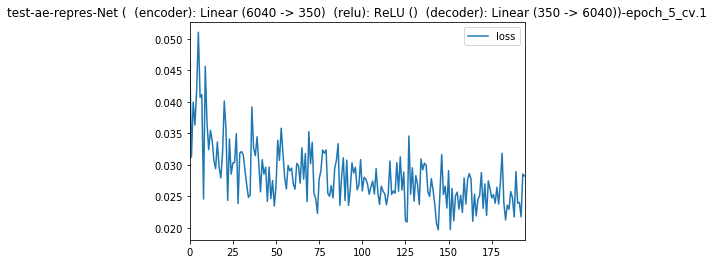

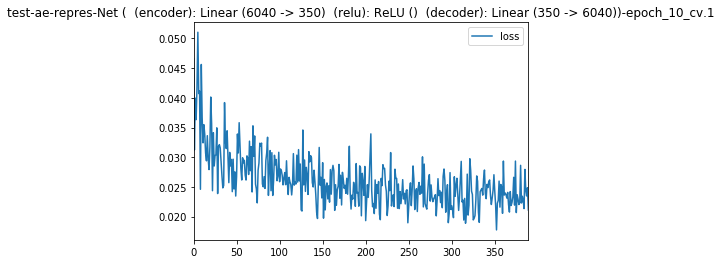

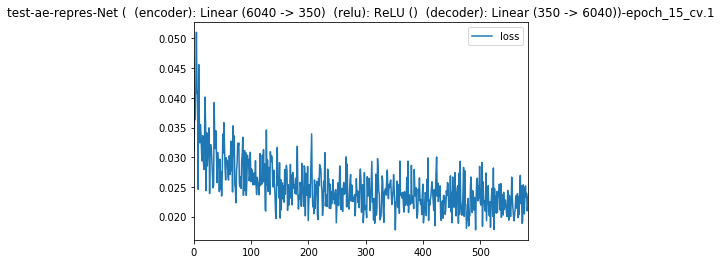

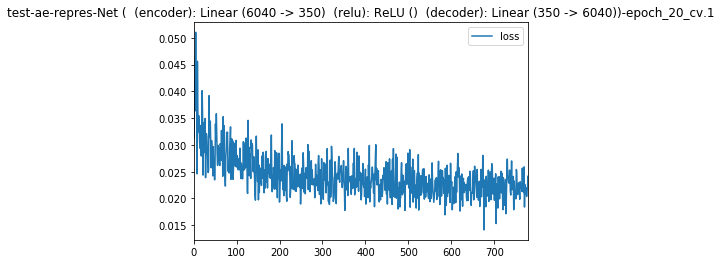

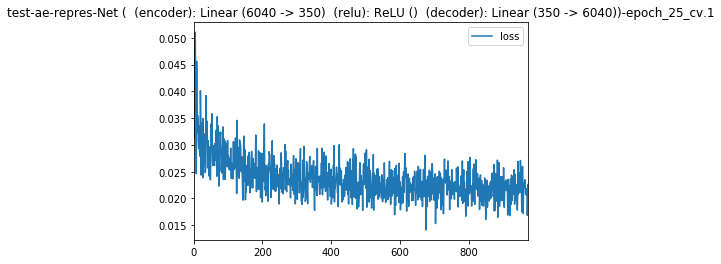

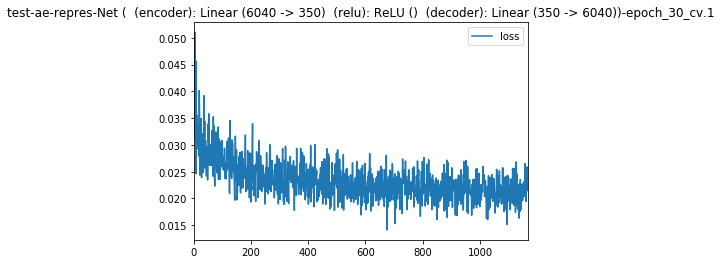

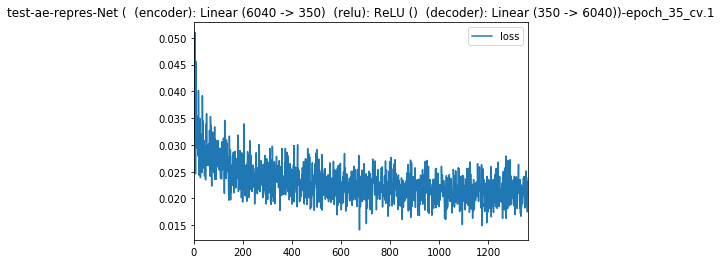

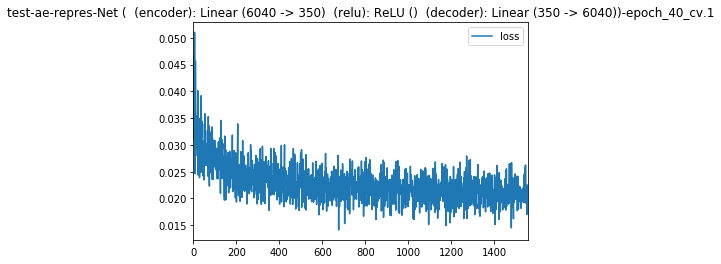

In [11]:
-

In [12]:
pred_perf

{5: (0.42649006622516561, 0.042020011343152829),
 10: (0.28609271523178809, 0.037338740821353023),
 15: (0.26622516556291392, 0.03687006483986522),
 20: (0.27350993377483446, 0.038816556134387344),
 25: (0.25397350993377482, 0.0385361895047815),
 30: (0.25298013245033113, 0.03896618936855132),
 35: (0.24933774834437089, 0.037818098621668177),
 40: (0.26125827814569541, 0.040475758051355747)}

In [13]:
cf_perf

{5: {'decode': {5: (0.32880794701986754, 0.034202953385118202),
   50: (0.41390728476821198, 0.043002910171496725),
   100: (0.4258278145695365, 0.04459965960894096),
   500: (0.43013245033112585, 0.041738462034452299),
   1000: (0.39801324503311258, 0.038827136274529668)},
  'hidden': {5: (0.36357615894039735, 0.040467909977433075),
   50: (0.37649006622516556, 0.042086928451282049),
   100: (0.36390728476821194, 0.038773607353293417),
   500: (0.31390728476821195, 0.030447495514824906),
   1000: (0.24304635761589405, 0.023924464238930514)},
  'hidden_relu': {5: (0.29900662251655635, 0.032516707047558158),
   50: (0.42715231788079472, 0.044822927623368376),
   100: (0.41589403973509931, 0.043209776308212294),
   500: (0.42814569536423847, 0.042426661115402407),
   1000: (0.39072847682119205, 0.039079260668574145)}},
 10: {'decode': {5: (0.2456953642384106, 0.028822491836381102),
   50: (0.35099337748344372, 0.039458496735628137),
   100: (0.37185430463576163, 0.040482794813180657),
  

In [14]:
cf_perf_list = []
for iteration in cf_perf.keys():
    d1 = cf_perf[iteration]
    for hidden in d1.keys():
        d2 = d1[hidden]
        for knn in d2.keys():
            v3 = d2[knn]
            cf_perf_list.append((iteration, hidden, knn,v3[0], v3[1]))

In [15]:
cf_perf_df = pd.DataFrame(cf_perf_list, columns=['iteration','hidden','knn','precision','recall'])

In [16]:
cf_perf_df = cf_perf_df.sort_values(by=['iteration','hidden','knn'])

In [36]:
cf_perf_df[cf_perf_df.groupby('iteration')['precision'].transform(max) == cf_perf_df['precision']]

,iteration,hidden,knn,precision,recall
16,5,decode,500,0.430132,0.041738
48,10,decode,100,0.371854,0.040483
73,15,hidden_relu,100,0.376490,0.042228
86,20,hidden_relu,500,0.375828,0.041838
101,25,hidden_relu,500,0.361589,0.040805
118,30,hidden_relu,100,0.364238,0.045279
13,35,hidden_relu,100,0.375828,0.045681
43,40,hidden_relu,100,0.360927,0.043842


In [68]:
cf_perf_df

,iteration,hidden,knn,precision,recall
19,5,decode,5,0.328808,0.034203
17,5,decode,50,0.413907,0.043003
18,5,decode,100,0.425828,0.044600
16,5,decode,500,0.430132,0.041738
15,5,decode,1000,0.398013,0.038827
24,5,hidden,5,0.363576,0.040468
22,5,hidden,50,0.376490,0.042087
23,5,hidden,100,0.363907,0.038774
21,5,hidden,500,0.313907,0.030447
20,5,hidden,1000,0.243046,0.023924


In [37]:
pred_perf

{5: (0.42649006622516561, 0.042020011343152829),
 10: (0.28609271523178809, 0.037338740821353023),
 15: (0.26622516556291392, 0.03687006483986522),
 20: (0.27350993377483446, 0.038816556134387344),
 25: (0.25397350993377482, 0.0385361895047815),
 30: (0.25298013245033113, 0.03896618936855132),
 35: (0.24933774834437089, 0.037818098621668177),
 40: (0.26125827814569541, 0.040475758051355747)}

In [62]:
pred_perf_list = []
for iteration in pred_perf.keys():
    v3 = pred_perf[iteration]
    pred_perf_list.append((iteration, v3[0], v3[1]))

In [63]:
pred_perf_df = pd.DataFrame(pred_perf_list, columns=['cv','precision', 'recall'])

In [67]:
cf_perf_list

In [64]:
pred_perf_df

,cv,precision,recall
0,35,0.249338,0.037818
1,5,0.426490,0.042020
2,40,0.261258,0.040476
3,10,0.286093,0.037339
4,15,0.266225,0.036870
5,20,0.273510,0.038817
6,25,0.253974,0.038536
7,30,0.252980,0.038966


In [23]:
pred_perf

{5: (0.42649006622516561, 0.042020011343152829),
 10: (0.28609271523178809, 0.037338740821353023),
 15: (0.26622516556291392, 0.03687006483986522),
 20: (0.27350993377483446, 0.038816556134387344),
 25: (0.25397350993377482, 0.0385361895047815),
 30: (0.25298013245033113, 0.03896618936855132),
 35: (0.24933774834437089, 0.037818098621668177),
 40: (0.26125827814569541, 0.040475758051355747)}

In [18]:
representations

{5: {'decode': array([[ 0.29172873,  0.39390275,  0.4474552 , ..., -0.00632217,
           0.14508459,  0.75919086],
         [ 0.1085433 ,  0.02283736,  0.03162573, ...,  0.03749212,
           0.11460391,  0.09595172],
         [-0.02158736,  0.03454302,  0.01224532, ..., -0.01599247,
           0.0475162 , -0.04327041],
         ..., 
         [ 0.01567945, -0.00794968,  0.00519574, ...,  0.01908664,
          -0.01896276,  0.01095849],
         [ 0.01481872, -0.00544807, -0.00324617, ...,  0.01547206,
          -0.02177565,  0.01772507],
         [ 0.00892185,  0.0215905 ,  0.03538343, ...,  0.01867818,
          -0.00146704,  0.18250634]]),
  'hidden': array([[-7.60263586, -9.62615395, -2.92328858, ...,  2.35670447,
          -8.14483738, -8.17453289],
         [-3.32121968, -3.59062076, -1.46207023, ..., -0.2495487 ,
          -2.96918702, -2.13540959],
         [-2.23287344, -2.33199382, -0.80135012, ..., -0.24045844,
          -1.79092753, -0.15578157],
         ..., 
         

run hidden with larger neighborhood

In [19]:
import copy

In [20]:
cf_perf2 = copy.deepcopy(cf_perf)

In [21]:
import json

In [22]:
f = open('./ae_iter_no_sigmoid/cf_perf.json','w')
json.dump(cf_perf, f)